kaggle link : https://www.kaggle.com/datasets/aslanahmedov/walmart-sales-forecast?select=features.csv

# problem 
There are many seasons that sales are significantly higher or lower than averages. If the company does not know about these seasons, it can lose too much money. Predicting future sales is one of the most crucial plans for a company. Sales forecasting gives an idea to the company for arranging stocks, calculating revenue, and deciding to make a new investment. Another advantage of knowing future sales is that achieving predetermined targets from the beginning of the seasons can have a positive effect on stock prices and investors' perceptions. Also, not reaching the projected target could significantly damage stock prices, conversely. And, it will be a big problem especially for Walmart as a big company.

# Aim:
My aim in this project is to build a model which predicts sales of the stores. With this model, Walmart authorities can decide their future plans which is very important for arranging stocks, calculating revenue and deciding to make new investment or not.

#Columns:
Store - the unique identifier for each Walmart store.

Dept: The department number where the sales were recorded.

Date: The date on which the sales were recorded.

Weekly Sales (target) : The total sales for the given store and department in the given week.

IsHoliday: A Boolean variable indicating whether the week contains a holiday or not.

Temperature: The average temperature in the region where the store is located.

Fuel Price: The cost of fuel in the region where the store is located.

Markdown(1,2,3,4,5): A set of variables indicating whether markdowns were applied to the product in the given week. Markdowns are price reductions aimed at boosting sales.

CPI: The Consumer Price Index for the region where the store is located.

Unemployment: The unemployment rate in the region where the store is located.

Type: The type of store (A, B, or C) where the sales were recorded.

Size: The size of the store in square feet.

In [1]:
# importing the neccessary libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew,norm

import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading the  data
train=pd.read_csv("/content/train.csv")
features=pd.read_csv("/content/features.csv")
stores=pd.read_csv("/content/stores.csv")
test=pd.read_csv("/content/test.csv")

In [3]:
test.columns

Index(['Store', 'Dept', 'Date', 'IsHoliday'], dtype='object')

In [4]:
train.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [5]:
features.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [6]:
stores.columns

Index(['Store', 'Type', 'Size'], dtype='object')

EXPLORATORY DATA ANALYSIS

In [7]:
train.shape

(421570, 5)

In [8]:
features.shape

(8190, 12)

In [9]:
stores.shape

(45, 3)

In [10]:
train.nunique(axis=0)

Store               45
Dept                81
Date               143
Weekly_Sales    359464
IsHoliday            2
dtype: int64

In [11]:
features.nunique(axis=0)

Store             45
Date             182
Temperature     4178
Fuel_Price      1011
MarkDown1       4023
MarkDown2       2715
MarkDown3       2885
MarkDown4       3405
MarkDown5       4045
CPI             2505
Unemployment     404
IsHoliday          2
dtype: int64

In [12]:
stores.nunique(axis=0)

Store    45
Type      3
Size     40
dtype: int64

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [14]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [15]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


Converting DATE dtype 

In [16]:
# converting dtype of Date from object to Datetime
features['Date'] = pd.to_datetime(features['Date'])
train['Date'] = pd.to_datetime(train['Date'])

Dropping duplicates from data before merging 

In [17]:
# Checking and removing any duplicates from the data
train[train.duplicated()]
train.drop_duplicates(inplace=True)
train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [18]:
features[features.duplicated()]
features.drop_duplicates(inplace=True)
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [19]:
stores[stores.duplicated()]
stores.drop_duplicates(inplace=True)
stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [20]:
# merging stores and features data with same feature name Store
data_merge = pd.merge(stores,features,on=['Store'])

In [21]:
data_merge.head()

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,A,151315,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,A,151315,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,A,151315,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,A,151315,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [22]:
data_merge.isnull().sum()

Store              0
Type               0
Size               0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [23]:
data_merge["Date"].value_counts()

2010-02-05    45
2012-04-13    45
2012-04-27    45
2012-05-04    45
2012-05-11    45
              ..
2011-04-15    45
2011-04-22    45
2011-04-29    45
2011-05-06    45
2013-07-26    45
Name: Date, Length: 182, dtype: int64

In [24]:
train["Date"].value_counts()

2011-12-23    3027
2011-11-25    3021
2011-12-16    3013
2011-12-09    3010
2012-02-17    3007
              ... 
2010-07-09    2903
2010-07-16    2901
2010-08-20    2901
2010-08-27    2898
2010-08-13    2896
Name: Date, Length: 143, dtype: int64

In [25]:
train.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [26]:
data_merge.columns

Index(['Store', 'Type', 'Size', 'Date', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'IsHoliday'],
      dtype='object')

In [27]:
# merging train and data_merge 
data=pd.merge(data_merge,train,on=['Store','Date','IsHoliday'])

In [28]:
data.head()

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50
1,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27
2,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12
3,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04
4,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38


In [29]:
data.shape

(421570, 16)

In [30]:
data.nunique()

Store               45
Type                 3
Size                40
Date               143
Temperature       3528
Fuel_Price         892
MarkDown1         2277
MarkDown2         1499
MarkDown3         1662
MarkDown4         1944
MarkDown5         2293
CPI               2145
Unemployment       349
IsHoliday            2
Dept                81
Weekly_Sales    359464
dtype: int64

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Type          421570 non-null  object        
 2   Size          421570 non-null  int64         
 3   Date          421570 non-null  datetime64[ns]
 4   Temperature   421570 non-null  float64       
 5   Fuel_Price    421570 non-null  float64       
 6   MarkDown1     150681 non-null  float64       
 7   MarkDown2     111248 non-null  float64       
 8   MarkDown3     137091 non-null  float64       
 9   MarkDown4     134967 non-null  float64       
 10  MarkDown5     151432 non-null  float64       
 11  CPI           421570 non-null  float64       
 12  Unemployment  421570 non-null  float64       
 13  IsHoliday     421570 non-null  bool          
 14  Dept          421570 non-null  int64         
 15  Weekly_Sales  421

In [32]:
data.isnull().sum()

Store                0
Type                 0
Size                 0
Date                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday            0
Dept                 0
Weekly_Sales         0
dtype: int64

Dropping markdown column beacause they contain nearly 50% above data as null values 

In [33]:
#dropping columns
data = data.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])

In [34]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Size,421570.0,136727.915739,60980.583328,34875.000,93638.000000,140167.00000,202505.000000,219622.000000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
CPI,421570.0,171.201947,39.159276,126.064,132.022667,182.31878,212.416993,227.232807
Unemployment,421570.0,7.960289,1.863296,3.879,6.891000,7.86600,8.572000,14.313000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000


DATA VISUALIZATION

In [35]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

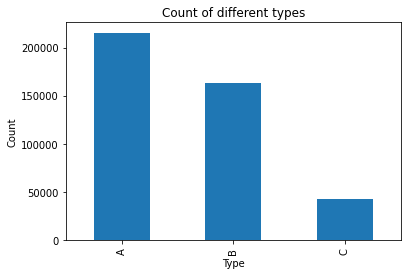

In [36]:
#Visualizing the Type Data
data["Type"].value_counts().plot(kind="bar")
plt.title("Count of different types")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


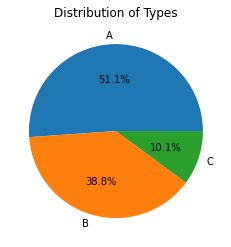

In [37]:
# Count the frequency of each value in the Type column
value_counts = data['Type'].value_counts()

# Create a pie chart
plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Types')
plt.show()


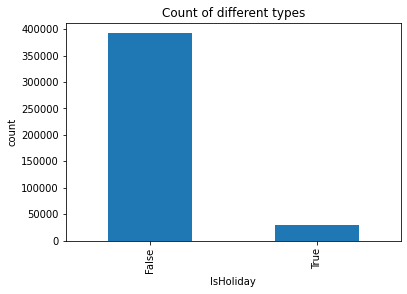

In [38]:
#Visualizing the IsHoliday Data
data["IsHoliday"].value_counts().plot(kind="bar")
plt.title("Count of different types")
plt.xlabel("IsHoliday")
plt.ylabel("count")
plt.show()


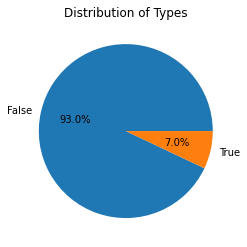

In [39]:
# Count the frequency of each value in the Type column
value_counts = data['IsHoliday'].value_counts()

# Create a pie chart
plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Types')
plt.show()


plotting the graph for average weekly sales for the years 2010,2011,2012

<Axes: xlabel='Day'>

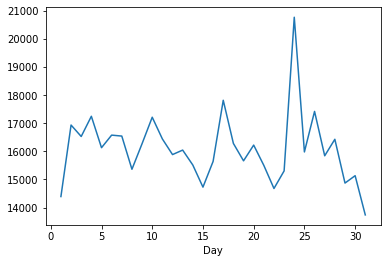

In [40]:
# Average Weekly Sales for the year 2010
weekly_sales_2010 = data[data['Year']==2010]['Weekly_Sales'].groupby(data['Day']).mean()

sns.lineplot(x=weekly_sales_2010.index, y=weekly_sales_2010.values)


<Axes: xlabel='Day'>

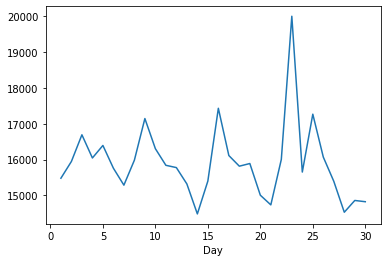

In [41]:
# Average Weekly Sales for the year 2011
weekly_sales_2011 = data[data['Year']==2011]['Weekly_Sales'].groupby(data['Day']).mean()

sns.lineplot(x=weekly_sales_2011.index, y=weekly_sales_2011.values) # for plotting then lineplot

<Axes: xlabel='Day'>

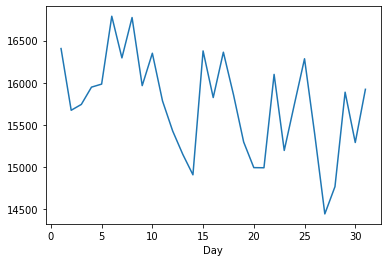

In [42]:
# Average Weekly Sales for the year 2012
weekly_sales_2012 = data[data['Year']==2012]['Weekly_Sales'].groupby(data['Day']).mean()

sns.lineplot(x=weekly_sales_2012.index, y=weekly_sales_2012.values)

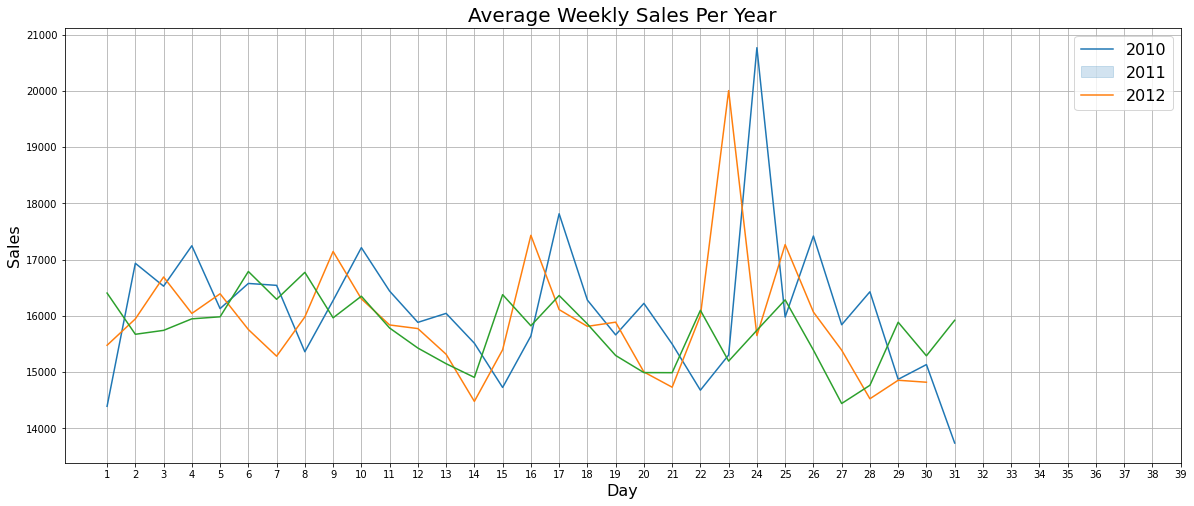

In [43]:
# Plotting the above three plot together 
plt.figure(figsize=(20,8))
sns.lineplot(x=weekly_sales_2010.index, y=weekly_sales_2010.values)
sns.lineplot(x=weekly_sales_2011.index, y=weekly_sales_2011.values)
sns.lineplot(x=weekly_sales_2012.index, y=weekly_sales_2012.values)
plt.grid()
plt.xticks(np.arange(1,40, step=1))
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.title('Average Weekly Sales Per Year', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Day', fontsize=16)
plt.show()

plotting the graph for average weekly sales for the department

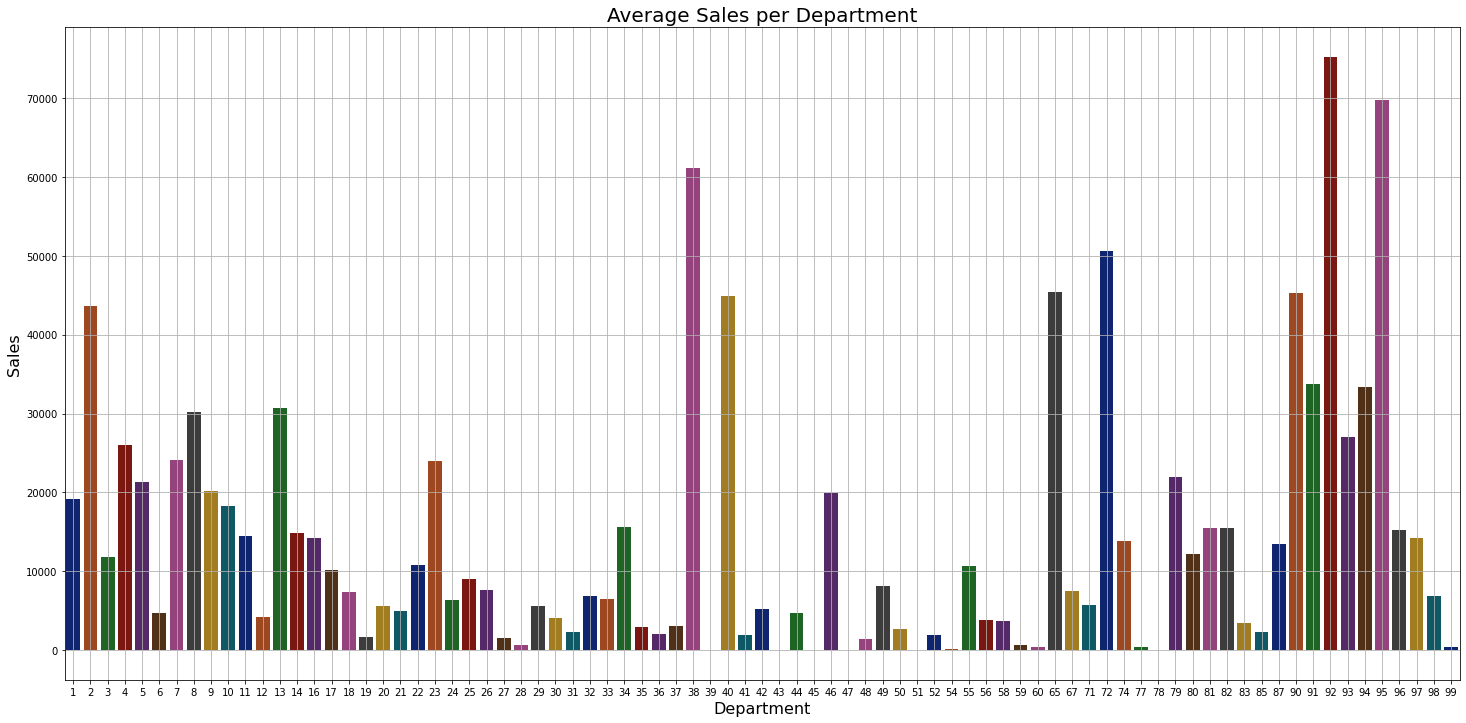

In [44]:
# Average Sales per Department

weekly_sales = data['Weekly_Sales'].groupby(data['Dept']).mean()
plt.figure(figsize=(25,12))
sns.barplot(x=weekly_sales.index, y=weekly_sales.values, palette='dark')
plt.grid()
plt.title('Average Sales per Department', fontsize=20)
plt.xlabel('Department', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.show()

plotting the graph for average weekly sales for the Store

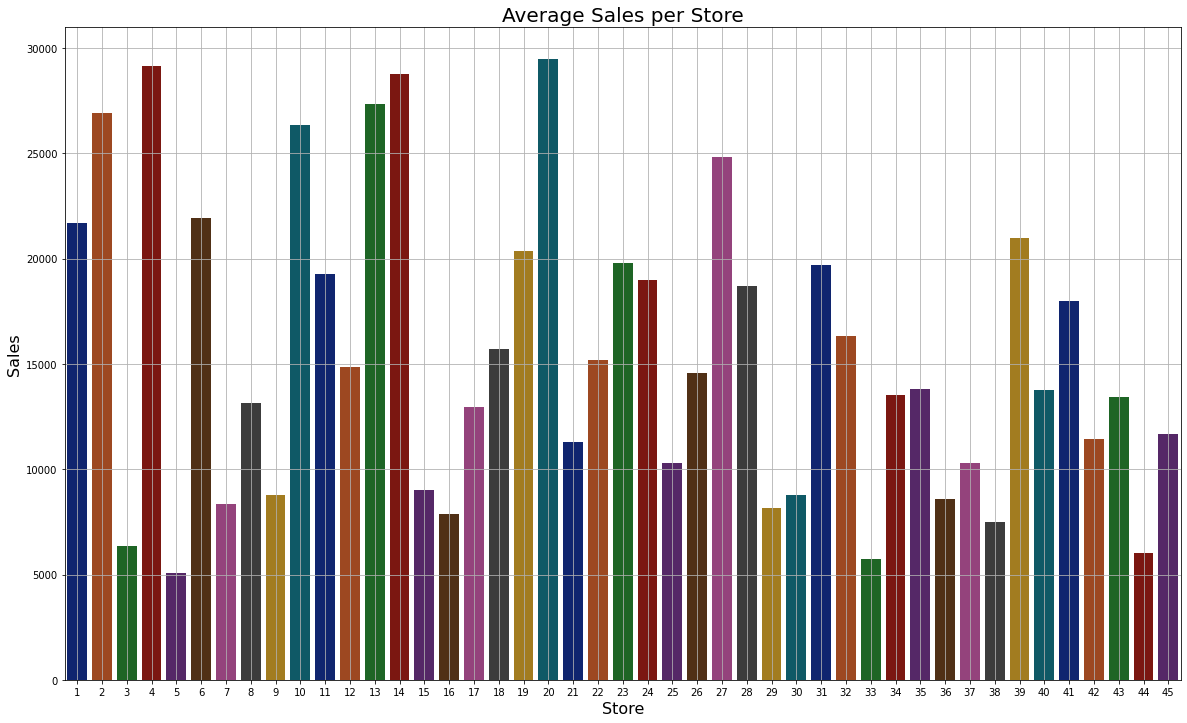

In [45]:
# Average Sales per Store

weekly_sales = data['Weekly_Sales'].groupby(data['Store']).mean()
plt.figure(figsize=(20,12))
sns.barplot(x=weekly_sales.index, y=weekly_sales.values, palette='dark')
plt.grid()
plt.title('Average Sales per Store', fontsize=20)
plt.xlabel('Store', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.show()

plotting scatter plot for all columns wrto target 

In [46]:
def scatter(data, column):
    plt.figure()
    plt.scatter(data[column], data['Weekly_Sales'])
    plt.ylabel('Weekly Sales')
    plt.xlabel(column)
    plt.grid(True)


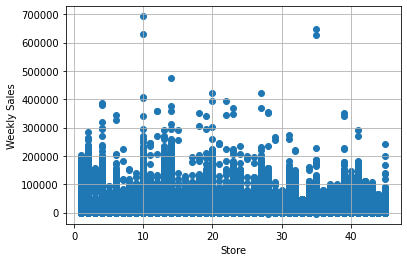

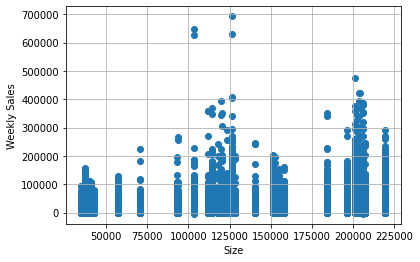

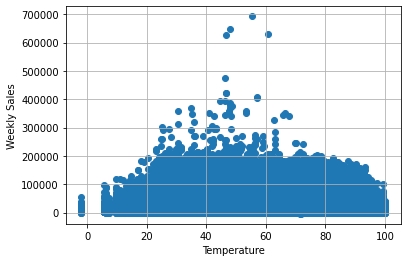

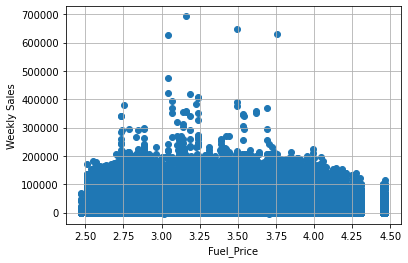

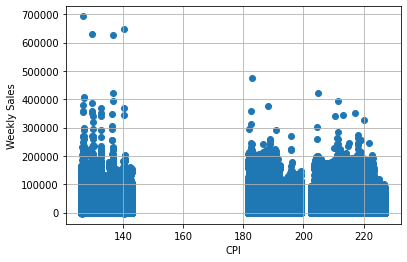

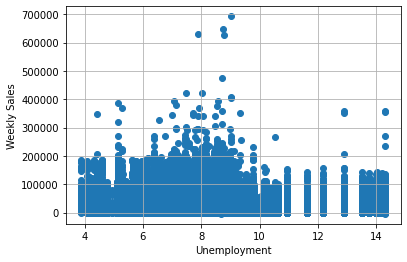

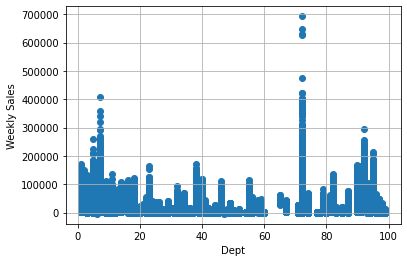

In [47]:
scatter(data, 'Store') # with respect to Store
scatter(data, 'Size')  # with respect to Size
scatter(data, 'Temperature') # with respect to Temperature
scatter(data, 'Fuel_Price')  # with respect to Fuel_Price
scatter(data, 'CPI')  # with respect to CPI
scatter(data, 'Unemployment')  # with respect to Unemployment
scatter(data, 'Dept')  # with respect to Dept

plotting Boxplot to observe the outliers 

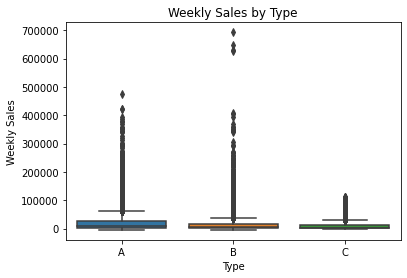

In [48]:
# plot boxplot
sns.boxplot(x="Type", y="Weekly_Sales", data=data)

# add title and labels
plt.title("Weekly Sales by Type")
plt.xlabel("Type")
plt.ylabel("Weekly Sales")

# show the plot
plt.show()


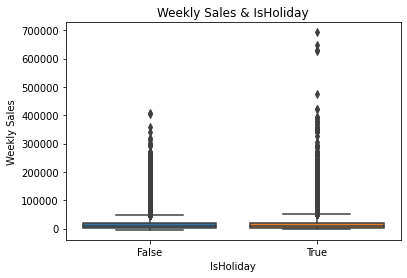

In [49]:
# plot boxplot
sns.boxplot(x="IsHoliday", y="Weekly_Sales", data=data)

# add title and labels
plt.title("Weekly Sales & IsHoliday")
plt.xlabel("IsHoliday")
plt.ylabel("Weekly Sales")

# show the plot
plt.show()


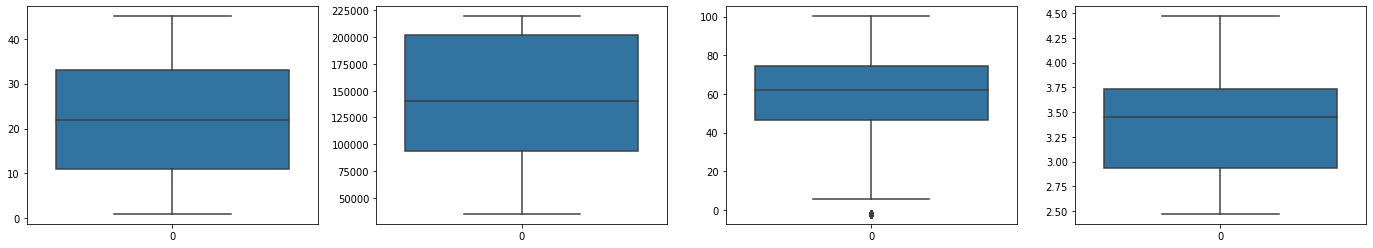

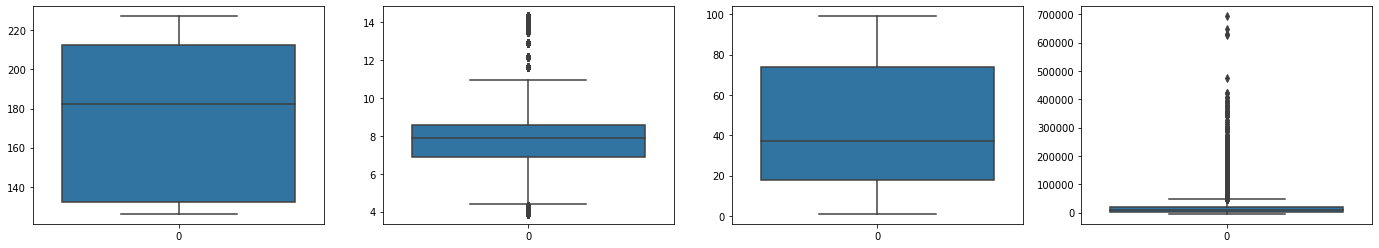

In [50]:
#plotting boxplot to know the outliers of data
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize = (24,4))
plt.subplot(1,4,1)
sns.boxplot(data['Store'])
plt.subplot(1,4,2)
sns.boxplot(data['Size'])
plt.subplot(1,4,3)
sns.boxplot(data['Temperature'])
plt.subplot(1,4,4)
sns.boxplot(data['Fuel_Price'])
plt.show()
plt.figure(figsize = (24,4))
plt.subplot(1,4,1)
sns.boxplot(data['CPI'])
plt.subplot(1,4,2)
sns.boxplot(data['Unemployment'])
plt.subplot(1,4,3)
sns.boxplot(data['Dept'])
plt.subplot(1,4,4)
sns.boxplot(data['Weekly_Sales'])
plt.show()

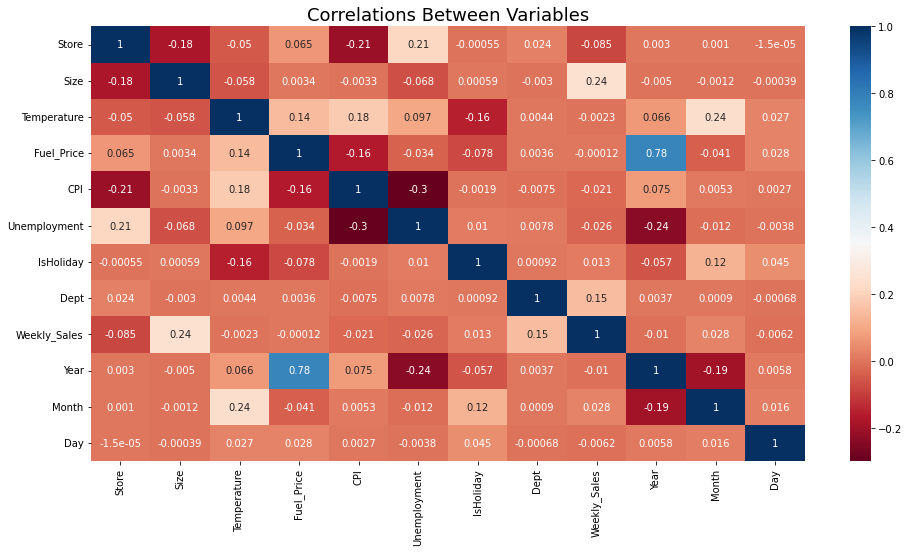

In [51]:
#correlation matrix
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(),annot=True, cmap="RdBu")
plt.title("Correlations Between Variables", size=18)
plt.show() #'RdBu' says take red to blue and having white in the middle , Red is negatively correlated and Blue is positively correlated

dropping the columns that are weakly correlated

In [52]:
data=data.drop(['Fuel_Price'],axis=1)

In [53]:
data.columns

Index(['Store', 'Type', 'Size', 'Date', 'Temperature', 'CPI', 'Unemployment',
       'IsHoliday', 'Dept', 'Weekly_Sales', 'Year', 'Month', 'Day'],
      dtype='object')

In [54]:
data_num=data[['Store','Size','Temperature','CPI','Unemployment','Dept','Weekly_Sales']]
data_num.head()

,Store,Size,Temperature,CPI,Unemployment,Dept,Weekly_Sales
0,1,151315,42.31,211.096358,8.106,1,24924.50
1,1,151315,42.31,211.096358,8.106,2,50605.27
2,1,151315,42.31,211.096358,8.106,3,13740.12
3,1,151315,42.31,211.096358,8.106,4,39954.04
4,1,151315,42.31,211.096358,8.106,5,32229.38


In [55]:
# normalizing the numerical columns
data_num = (data_num - data_num.min()) / (data_num.max() - data_num.min())
data_num

,Store,Size,Temperature,CPI,Unemployment,Dept,Weekly_Sales
0,0.0,0.630267,0.434149,0.840500,0.405118,0.000000,0.042851
1,0.0,0.630267,0.434149,0.840500,0.405118,0.010204,0.079638
2,0.0,0.630267,0.434149,0.840500,0.405118,0.020408,0.026829
3,0.0,0.630267,0.434149,0.840500,0.405118,0.030612,0.064380
4,0.0,0.630267,0.434149,0.840500,0.405118,0.040816,0.053315
...,...,...,...,...,...,...,...
421565,1.0,0.451136,0.595988,0.654796,0.458884,0.938776,0.010710
421566,1.0,0.451136,0.595988,0.654796,0.458884,0.948980,0.014600
421567,1.0,0.451136,0.595988,0.654796,0.458884,0.959184,0.087391
421568,1.0,0.451136,0.595988,0.654796,0.458884,0.979592,0.016913


In [56]:
data.columns

Index(['Store', 'Type', 'Size', 'Date', 'Temperature', 'CPI', 'Unemployment',
       'IsHoliday', 'Dept', 'Weekly_Sales', 'Year', 'Month', 'Day'],
      dtype='object')

In [57]:
data["Year"].value_counts()

2011    153453
2010    140679
2012    127438
Name: Year, dtype: int64

In [58]:
data["Month"].value_counts()

4     41332
7     40980
3     38451
10    38362
9     38339
8     38169
6     38137
2     35526
5     35314
12    29802
11    23613
1     23545
Name: Month, dtype: int64

In [59]:
data["Day"].value_counts()

23    14801
2     14799
6     14799
9     14796
17    14795
16    14768
10    14767
12    14760
13    14758
25    14753
30    14752
11    14749
26    14746
24    14741
3     14741
19    14739
5     14734
18    14733
20    14723
4     14703
27    14680
7     11786
22    11766
14    11763
15    11763
8     11762
1     11760
28    11752
21    11740
29    11736
31     5905
Name: Day, dtype: int64

In [60]:
data.shape

(421570, 13)

In [61]:
data.head()

,Store,Type,Size,Date,Temperature,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Year,Month,Day
0,1,A,151315,2010-02-05,42.31,211.096358,8.106,False,1,24924.50,2010,2,5
1,1,A,151315,2010-02-05,42.31,211.096358,8.106,False,2,50605.27,2010,2,5
2,1,A,151315,2010-02-05,42.31,211.096358,8.106,False,3,13740.12,2010,2,5
3,1,A,151315,2010-02-05,42.31,211.096358,8.106,False,4,39954.04,2010,2,5
4,1,A,151315,2010-02-05,42.31,211.096358,8.106,False,5,32229.38,2010,2,5


Mapping the categorical columns

In [62]:
# Converting 'Type' column to numerical
type_mapping = {'A': 1, 'B': 2, 'C': 3}
data['Type'] = data['Type'].map(type_mapping)

# Converting 'IsHoliday' column to numerical
holiday_mapping = {False: 0, True: 1}
data['IsHoliday'] = data['IsHoliday'].map(holiday_mapping)


 data['Date'] is not concatenated because we can't directy concat 2 different types as we already have day,month, year separately in data so there is no need of cancatenating date specifically and Concatenating the data_num and data['type'] 

In [63]:
data1 = pd.concat([data_num,data['Type']],axis=1)
data1

,Store,Size,Temperature,CPI,Unemployment,Dept,Weekly_Sales,Type
0,0.0,0.630267,0.434149,0.840500,0.405118,0.000000,0.042851,1
1,0.0,0.630267,0.434149,0.840500,0.405118,0.010204,0.079638,1
2,0.0,0.630267,0.434149,0.840500,0.405118,0.020408,0.026829,1
3,0.0,0.630267,0.434149,0.840500,0.405118,0.030612,0.064380,1
4,0.0,0.630267,0.434149,0.840500,0.405118,0.040816,0.053315,1
...,...,...,...,...,...,...,...,...
421565,1.0,0.451136,0.595988,0.654796,0.458884,0.938776,0.010710,2
421566,1.0,0.451136,0.595988,0.654796,0.458884,0.948980,0.014600,2
421567,1.0,0.451136,0.595988,0.654796,0.458884,0.959184,0.087391,2
421568,1.0,0.451136,0.595988,0.654796,0.458884,0.979592,0.016913,2


In [64]:
data_final= pd.concat([data1,data['IsHoliday']],axis=1)
data_final.head()

,Store,Size,Temperature,CPI,Unemployment,Dept,Weekly_Sales,Type,IsHoliday
0,0.0,0.630267,0.434149,0.8405,0.405118,0.000000,0.042851,1,0
1,0.0,0.630267,0.434149,0.8405,0.405118,0.010204,0.079638,1,0
2,0.0,0.630267,0.434149,0.8405,0.405118,0.020408,0.026829,1,0
3,0.0,0.630267,0.434149,0.8405,0.405118,0.030612,0.064380,1,0
4,0.0,0.630267,0.434149,0.8405,0.405118,0.040816,0.053315,1,0


In [65]:
data_final.shape

(421570, 9)

train and test split

In [66]:
# importing neccessary libraries
from sklearn.model_selection import train_test_split

# splitting of data
X = data_final.drop(['Weekly_Sales'],axis=1)
Y = data_final['Weekly_Sales']

In [67]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

MODEL BUILDING

k-NEAREST NEIGHBOUR REGRESSION

In [68]:
# K-Nearest Neighbor Regressor
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=4)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=4)

In [69]:
trainpreds_knn=knn.predict(x_train)

In [70]:
# Error Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mae = mean_absolute_error(y_train, trainpreds_knn)
mse = mean_squared_error(y_train, trainpreds_knn)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, trainpreds_knn)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.009575916895535129
Mean Squared Error: 0.00028910184499069763
Root Mean Squared Error: 0.017002995177047415
R-squared: 0.7244168012359833


In [71]:
# K-Nearest Neighbor Regressor
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=4)
knn.fit(x_test,y_test)

KNeighborsRegressor(n_neighbors=4)

In [72]:
testpreds_knn=knn.predict(x_test)

In [73]:
# Error Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mae = mean_absolute_error(y_test, testpreds_knn)
mse = mean_squared_error(y_test, testpreds_knn)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, testpreds_knn)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.010765364837338103
Mean Squared Error: 0.00035462490903424946
Root Mean Squared Error: 0.01883148717000995
R-squared: 0.6717127400050823


This could be an indication of overfitting, where the model is too complex and captures noise and idiosyncrasies in the training data, leading to lower performance on the test data.

LINEAR REGRESSION

In [74]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [75]:
trainpreds_linreg=linreg.predict(x_train)

In [76]:
# Error Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mae = mean_absolute_error(y_train, trainpreds_linreg)
mse = mean_squared_error(y_train, trainpreds_linreg)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, trainpreds_linreg)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.020808892565390782
Mean Squared Error: 0.0009591079599125139
Root Mean Squared Error: 0.030969468189048936
R-squared: 0.08574073762405199


In [77]:
linreg.fit(x_test,y_test)
testpreds_linreg=linreg.predict(x_test)

# Error Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mae = mean_absolute_error(y_test, testpreds_linreg)
mse = mean_squared_error(y_test, testpreds_linreg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, testpreds_linreg)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.02097337224756651
Mean Squared Error: 0.0009865041991875797
Root Mean Squared Error: 0.03140866439674855
R-squared: 0.08676251364651555


This indicates that the model is not good fit for the data.

LASSO REGRESSION

In [78]:
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.1)
lassoreg.fit(x_train,y_train)
trainpreds_lassoreg=lassoreg.predict(x_train)

In [79]:
# Error Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mae = mean_absolute_error(y_train, trainpreds_lassoreg)
mse = mean_squared_error(y_train, trainpreds_lassoreg)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, trainpreds_lassoreg)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.021654057264329868
Mean Squared Error: 0.0010490546821697103
Root Mean Squared Error: 0.032389113636679075
R-squared: 0.0


In [80]:
lassoreg.fit(x_test,y_test)
testpreds_lassoreg=lassoreg.predict(x_test)

In [81]:
# Error Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mae = mean_absolute_error(y_test, testpreds_lassoreg)
mse = mean_squared_error(y_test, testpreds_lassoreg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, testpreds_lassoreg)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.021868343656578196
Mean Squared Error: 0.0010802274478751916
Root Mean Squared Error: 0.03286681377735286
R-squared: 0.0


it means that the model is not able to explain any of the variability in the data and is not making accurate predictions.

RIDGE REGRESSION

In [82]:
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0.1)
ridgereg.fit(x_train,y_train)
trainpreds_ridgereg=ridgereg.predict(x_train)

In [83]:
# Error Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mae = mean_absolute_error(y_train, trainpreds_ridgereg)
mse = mean_squared_error(y_train, trainpreds_ridgereg)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, trainpreds_ridgereg)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.020808889616708313
Mean Squared Error: 0.000959107959915553
Root Mean Squared Error: 0.030969468189098
R-squared: 0.08574073762115508


In [84]:
ridgereg.fit(x_test,y_test)
testpreds_ridgereg=ridgereg.predict(x_test)

# Error Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mae = mean_absolute_error(y_test, testpreds_ridgereg)
mse = mean_squared_error(y_test, testpreds_ridgereg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, testpreds_ridgereg)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.020973365505708472
Mean Squared Error: 0.0009865041992051136
Root Mean Squared Error: 0.03140866439702767
R-squared: 0.08676251363028387


This indicates that the model is not good fit for the data.

DECISION TREE REGRESSOR

In [85]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
trainpreds_dtr=dtr.predict(x_train)

In [86]:
# Error Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mae = mean_absolute_error(y_train, trainpreds_dtr)
mse = mean_squared_error(y_train, trainpreds_dtr)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, trainpreds_dtr)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 3.946503102482925e-12
Mean Squared Error: 4.734262713647452e-20
Root Mean Squared Error: 2.175836095308526e-10
R-squared: 1.0


In [87]:
dtr.fit(x_test, y_test)
testpreds_dtr=dtr.predict(x_test)

In [88]:
# Error Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mae = mean_absolute_error(y_test, testpreds_dtr)
mse = mean_squared_error(y_test, testpreds_dtr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, testpreds_dtr)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 2.4540917200742787e-12
Mean Squared Error: 2.5148959826089596e-20
Root Mean Squared Error: 1.5858423574267903e-10
R-squared: 1.0


This may indicate that the model is a good fit for the data and may be able to make accurate predictions on new unseen data.Also keep in mind that perfectly fit model also fails in some cases while predictiong the unseen data


RANDOM FOREST REGRESSION

In [89]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)


RandomForestRegressor()

In [90]:
trainpreds_rfr=rfr.predict(x_train)

In [91]:
# Error Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mae = mean_absolute_error(y_train, trainpreds_rfr)
mse = mean_squared_error(y_train, trainpreds_rfr)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, trainpreds_rfr)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.0010388464911693079
Mean Squared Error: 9.054765514220378e-06
Root Mean Squared Error: 0.0030091137423202165
R-squared: 0.9913686429619734


In [92]:
rfr.fit(x_test, y_test)
testpreds_rfr=rfr.predict(x_test)

In [93]:
# Error Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mae = mean_absolute_error(y_test, testpreds_rfr)
mse = mean_squared_error(y_test, testpreds_rfr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, testpreds_rfr)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.0011968219237001045
Mean Squared Error: 1.2453428214885298e-05
Root Mean Squared Error: 0.003528941514800904
R-squared: 0.9884714758550329


 the model is able to predict the target variable with high accuracy and generalizes well to new data.Also check that the model is not performing overfit condition for other performance metric like cross-validation
 